# 1. Введение

 В этом модуле мы поговорим об ещё одном направлении разведывательного анализа данных — проектировании признаков (Feature Engineering). Этот процесс также называют конструированием признаков или разработкой признаков. Все эти термины описывают процесс создания признаков, которые нужны для обучения модели.

Как мы выяснили в предыдущих модулях, бывает недостаточно данных, собранных после этапа формирования проблемы. Данные могут быть представлены в «неподобающем» для обучения виде, например в формате даты или времени, большого текста. 

_Пример_

_При прогнозировании дефолта клиента банка для создания прогнозной модели очень важно иметь информацию о дате выдачи кредита, плановой и действительной датах погашения. Эти даты дают нам представление о характере погашения кредита: был он выплачен вовремя или раньше срока, с просрочкой._

Избавляться от перечисленных выше данных было бы неправильно, ведь мы можем лишиться части потенциально важной информации. Проектирование признаков как раз занимается преобразованием такой информации в признаки для будущей модели машинного обучения. 

На этапе проектирования признаков специалисты по данным преследуют такие же цели, как на этапе сбора данных — сконструировать как можно больше признаков, чтобы далее отобрать из них лучшие.



# 2. Создание признаков

Проектирование признаков — самый творческий процесс во всём цикле жизни создания модели машинного обучения. 

Он включает в себя несколько этапов: 
1. создание признаков;
2. преобразование признаков;
3. отбор признаков.

__Создание признаков, feature extraction, часто именуемое генерацией признаков, — творческий процесс извлечения новых признаков путём создания признаков из существующего набора данных или путём использования дополнительной информации.__

Новые признаки могут быть сконструированы двумя способами: 
* с помощью внешних источников данных;
* из существующего набора данных.

Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

1. разбор категорий; 
2. разбор даты и времени;
3. разбор числовых признаков;
4. разбор текста.


In [1]:
import pandas as pd
data = pd.read_csv('wine_cleared.zip')
display(data.head())

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


__РАЗБОР ДАТЫ И ВРЕМЕНИ__

Признаки, обозначающие дату и время, могут содержать много полезной информации. 

Например, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать.

Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

__РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН__

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

In [2]:
data['price_round'] = data['price'].round().astype(int)
display(data['price_round'])

0         35
1         15
2         14
3         13
4         65
          ..
129966    28
129967    75
129968    30
129969    32
129970    21
Name: price_round, Length: 129971, dtype: int32

Для таких преобразований важен контекст. В контексте вина для сомелье цена в 35$ и 35.363389$ одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.

__Однако такое преобразование неуместно в ситуациях, когда сотые важны. Например, при предсказании курса лиры стоимость валюты в 6.12 руб. и в 6.84 руб. — абсолютно разные ситуации.__

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. О необходимости таких преобразований вы узнаете далее в юните преобразования данных.

__РАЗБОР ТЕКСТА__

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

__Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.__

Например, с помощью такого регулярного выражения [^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+ можно найти любой email в тексте.

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья [Python RegEx: практическое применение регулярок.](https://tproger.ru/translations/regular-expression-python/)

__Из статьи Python RegEx: практическое применение регулярок.__

Регулярками в Python называются шаблоны, которые используются для поиска соответствующего фрагмента текста и сопоставления символов.

Грубо говоря, у нас есть input-поле, в которое должен вводиться email-адрес. Но пока мы не зададим проверку валидности введённого email-адреса, в этой строке может оказаться совершенно любой набор символов, а нам это не нужно.

Чтобы выявить ошибку при вводе некорректного адреса электронной почты, можно использовать следующее регулярное выражение:

```python
r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+(?:\.[a-zA-Z0-9-]+)+$'
```

По сути, наш шаблон — это набор символов, который проверяет строку на соответствие заданному правилу. Давайте разберёмся, как это работает.

__Синтаксис RegEx__

Синтаксис у регулярок необычный. Символы могут быть как буквами или цифрами, так и метасимволами, которые задают шаблон строки:

|Спец.символ|Зачем нужен|
|-----------|-----------|
|__.__|Задает __один__ произвольный символ|
|__[]__|Заменяет символ из квадратных скобок|
|__-__|Задает один символ, которого не должно быть в скобках|
|__[^ ]__|Задает один символ из не содержащихся в квадратных скобках|
|__^__|Обозначает начало последовательности|
|__$__|Обозначает окончание строки|
|__*__|Обозначает произвольное число повторений одного символа|
|__?__|Обозначает строго одно повторение символа|
|__+__|Обозначает один символ, который повторяется несколько раз|
|  Прямая черта |Логическое __ИЛИ__. Либо выражение до, либо выражение после символа|
| \ |Экранирование. Для использования метасимволов в качестве обычных|
|__()__|Группирует символы внутри|
|__{}__|Указывает число повторений предыдущего символа|

Также есть дополнительные конструкции, которые позволяют сокращать регулярные выражения:

\d — соответствует любой одной цифре и заменяет собой выражение [0-9];
\D — исключает все цифры и заменяет [^0-9];
\w — заменяет любую цифру, букву, а также знак нижнего подчёркивания;
\W — любой символ кроме латиницы, цифр или нижнего подчёркивания;
\s — соответствует любому пробельному символу;
\S — описывает любой непробельный символ.

Для чего используются регулярные выражения
для определения нужного формата, например телефонного номера или email-адреса;
для разбивки строк на подстроки;
для поиска, замены и извлечения символов;
для быстрого выполнения нетривиальных операций.

Синтаксис  таких выражений в основном стандартизирован, так что вам следует понять их лишь раз, чтобы использовать в любом языке программирования.

__Регулярные выражения в Python__ 
В Python для работы с регулярками есть модуль re. Его нужно просто импортировать:

In [3]:
import re

А вот наиболее популярные методы, которые предоставляет модуль:
```python
re.match()
re.search()
re.findall()
re.split()
re.sub()
re.compile()
```
Рассмотрим каждый из них подробнее.

```python
re.match(pattern, string)
```

Этот метод ищет по заданному шаблону в начале строки. Например, если мы вызовем метод match() на строке «AV Analytics AV» с шаблоном «AV», то он завершится успешно. Но если мы будем искать «Analytics», то результат будет отрицательный:

In [4]:
import re
result = re.match(r'AV', 'AV Analytics Vidhya AV')
print(result)

<re.Match object; span=(0, 2), match='AV'>


Искомая подстрока найдена. Чтобы вывести её содержимое, применим метод group() (мы используем «r» перед строкой шаблона, чтобы показать, что это «сырая» строка в Python):

In [5]:
result = re.match(r'AV', 'AV Analytics Vidhya AV')
print(result.group(0))

AV


Теперь попробуем найти «Analytics» в данной строке. Поскольку строка начинается на «AV», метод вернет None:



In [6]:
result = re.match(r'Analytics', 'AV Analytics Vidhya AV')
print(result)

None


Также есть методы start() и end() для того, чтобы узнать начальную и конечную позицию найденной строки

In [7]:
result = re.match(r'AV', 'AV Analytics Vidhya AV')
print(result.start(),
      result.end())

0 2


re.search(pattern, string)
Метод похож на match(), но ищет не только в начале строки. В отличие от предыдущего, search() вернёт объект, если мы попытаемся найти «Analytics»:

In [8]:
result = re.search(r'Analytics', 'AV Analytics Vidhya AV')
print(result.group(0))

Analytics


Метод search() ищет по всей строке, но возвращает только первое найденное совпадение.

__re.findall(pattern, string)__
Возвращает список всех найденных совпадений. У метода findall() нет ограничений на поиск в начале или конце строки. Если мы будем искать «AV» в нашей строке, он вернет все вхождения «AV». Для поиска рекомендуется использовать именно findall(), так как он может работать и как re.search(), и как re.match().

In [9]:
result = re.findall(r'AV', 'AV Analytics Vidhya AV')
print(result)

['AV', 'AV']


__re.split(pattern, string, [maxsplit=0])__
Этот метод разделяет строку по заданному шаблону.

In [10]:
result = re.split(r'y', 'Analytics')
print(result)

['Anal', 'tics']


В примере мы разделили слово «Analytics» по букве «y». Метод split() принимает также аргумент maxsplit со значением по умолчанию, равным 0. В данном случае он разделит строку столько раз, сколько возможно, но если указать этот аргумент, то разделение будет произведено не более указанного количества раз. Давайте посмотрим на примеры Python RegEx:

In [11]:
result = re.split(r'i', 'Analytics Vidhya')
print(result)

['Analyt', 'cs V', 'dhya']


In [12]:
result = re.split(r'i', 'Analytics Vidhya',maxsplit=1)
print(result)

['Analyt', 'cs Vidhya']


Мы установили параметр maxsplit равным 1, и в результате строка была разделена на две части вместо трех.

__re.sub(pattern, repl, string)__
Ищет шаблон в строке и заменяет его на указанную подстроку. Если шаблон не найден, строка остается неизменной.

In [13]:
result = re.sub(r'India', 'the World', 'AV is largest Analytics community of India')
print(result)

AV is largest Analytics community of the World


__re.compile(pattern, repl, string)__
Мы можем собрать регулярное выражение в отдельный объект, который может быть использован для поиска. Это также избавляет от переписывания одного и того же выражения.

In [14]:
pattern = re.compile('AV')
result = pattern.findall('AV Analytics Vidhya AV')
print(result)
result2 = pattern.findall('AV is largest analytics community of India')
print(result2)

['AV', 'AV']
['AV']


До сих пор мы рассматривали поиск определенной последовательности символов. Но что, если у нас нет определенного шаблона, и нам надо вернуть набор символов из строки, отвечающий определенным правилам? Такая задача часто стоит при извлечении информации из строк. Это можно сделать, написав выражение с использованием специальных символов. Вот наиболее часто используемые из них:

Оператор	Описание
1. .	Один любой символ, кроме новой строки \n.
2. ?	0 или 1 вхождение шаблона слева
3. \+	1 и более вхождений шаблона слева
4. \*	0 и более вхождений шаблона слева
5. \w	Любая цифра или буква (\W — все, кроме буквы или цифры)
6. \d	Любая цифра [0-9] (\D — все, кроме цифры)
7. \s	Любой пробельный символ (\S — любой непробельный символ)
8. \b	Граница слова
9. [..]	Один из символов в скобках ([^..] — любой символ, кроме тех, что в скобках)
10. \	Экранирование специальных символов (\. означает точку или \+ — знак «плюс»)
11. ^ и $	Начало и конец строки соответственно
12. {n,m}	От n до m вхождений ({,m} — от 0 до m)
13. a|b	Соответствует a или b
14. ()	Группирует выражение и возвращает найденный текст
15. \t, \n, \r	Символ табуляции, новой строки и возврата каретки соответственно

Больше информации по специальным символам можно найти в [документации](https://docs.python.org/3.8/library/re.html) для регулярных выражений в Python 3.

Перейдём к практическому применению Python регулярных выражений и рассмотрим примеры.


На сайте ihateregex.io можно писать регулярки и видеть вспомогательную диаграмму


# Возвращаемся к курсу
Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом str.findall(). Метод возвращает все совпадения с заданным шаблоном в серии pandas. 

In [15]:
regex = '\d{4}'
data['year'] = data['title'].str.findall(regex).str.get(0)
display(data['year'])

0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 129971, dtype: object

Разберём регулярное выражение \d{4}:

\d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
{4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте https://ihateregex.io.

Однако при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.

__РАЗБОР КАТЕГОРИЙ__

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [16]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [17]:
data['country'].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [18]:
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)

In [19]:
print('Количество произведенных во Франции:', data['is_france'].sum())
print('Количество произведенных в Италии:', data['is_italy'].sum())


Количество произведенных во Франции: 22093
Количество произведенных в Италии: 19540


Вы можете углубиться в разбор категориальных признаков — создать бинарный признак для каждого значения страны. Можно не делать это вручную: существуют специальные способы кодирования. Об особенностях этого подхода мы поговорим в юните Кодирование данных.

Также вы можете создавать некие бизнес-правила, гипотезы. О правилах их построения вы узнаете далее в материалах, посвящённых статистическим гипотезам. 

Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете 40 % вин старше 2010 года. 

In [20]:
data['year'] = data['year'].astype('float64')
data['old_wine'] = data['year'].apply(lambda x: 1 if x < 2010 else 0)

In [21]:
print('Число старых вин:', data['old_wine'].sum())

Число старых вин: 39781


Итак, разбор категориальных признаков может быть использован для выделения самых популярных, уникальных категорий в отдельный признак.

Таким образом, разбор категорий, даты и времени, числовых признаков, текста применяются для создания новых, более сильных признаков для обучения.


Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

Ответом на это задание является получившееся регулярное выражение и код преобразования.

In [22]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

# 3. Создание признаков. Внешние источники данных

__Внешние источники данных — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.__

__Компания, занимающаяся построением предсказательной модели, может запросить данные в качестве услуги (data as a service) у компании-провайдера данных. Это случай обогащения датасета закрытыми данными. Источниками закрытых данных являются сотовые операторы, БКИ, Госуслуги, ФССП (Федеральная служба судебных приставов) и так далее.__

Для получения информации из внешних источников данных специалисты по данным могут скачивать информацию с сайтов, парсить их и взаимодействовать с внешними сервисами по API.

Также специалисты по данным используют API или парсинг для получения дополнительной информации. Вы уже научились парсингу сайтов и работе с API в модуле PYTHON-17. Как получать данные из веб-источников и API.

__Когда данные получить необходимо, а API у источника данных нет, дата-инженеры прибегают к парсингу.__

## Внешняя информация бывает общая и профильная.

_Общая внешняя информация — это различные общие географические, экологические, статистические и другие данные._

* географические: население страны, площадь страны, столица страны и так далее.
* экологические: среднегодовая температура местности, текущее время года, уровень загрязнения воздуха и так далее.
* статистические: доходы населения, половозрастной состав, уровень безработицы и так далее.

Они находятся в открытых источниках: Росстат, Википедия и так далее.

Для доступа к ним применяется парсинг, скачивание и работа с файлами файлов, реже — работа по API.

_Профильная внешняя информация — информация, связанная со сферой бизнеса, проблему которого необходимо решить._

Для доступа к такой информации часто применяются запросы по API, парсинг, работа с файлами

## РАБОТА С ФАЙЛАМИ

Чтобы проверить, влияет ли на качество вина населённость, выясним информацию о населении страны, в котором была произведена бутылка вина. 

In [23]:
country_population = pd.read_csv('country_population.zip', sep=';')
display(country_population.head())

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"


In [24]:
print('Население Италии -', country_population[country_population['country'] == 'Italy']['population'].iloc[0])

Население Италии - 59,097,904


Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

Используем для этого функцию для объединения датасетов join. Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:

In [25]:
data = data.join(country_population.set_index('country'), on='country')

Итак, мы получили новый признак для нашего датасета — население страны.

In [26]:
country_area = pd.read_csv('country_area.zip', sep=';')
country_area.head()

,country,area
0,Russia,17075400.0
1,Canada,9984670.0
2,China,9596960.0
3,US,9372610.0
4,Brazil,8547000.0


In [27]:
data = data.join(country_area.set_index('country'), on='country')
data.loc[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_italy,is_france,old_wine,locality,population,area
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Gård,22,2014.0,1,0,0,0,Columbia Valley (WA,"333,022,386",9372610.0


Итак, мы получили два новых признака, используя общую внешнюю информацию и навыки выгрузки данных и файлов различных форматов. Более профессиональные методы, например парсинг, вы будете использовать в практических проектах, чтобы получить профильную внешнюю информацию.

Внешней информации можно получить очень много. Руководствуйтесь следующими правилами при работе с внешними источниками данных:

1. Старайтесь найти профильную информацию по вашей бизнес-проблеме. При предсказании рейтинга фильма информация об успехе режиссёра в других картинах будет полезнее, чем среднегодовая
 температура страны, в которой снят фильм.
2. Если у вас много времени и ресурсов, соберите как можно больше признаков любого качества. Чем больше данных вы сгенерируете, тем выше вероятность получить качественные признаки на этапе отбора данных.
3. Используйте наименее трудозатратный для вас метод поиска информации: работа с файлами, парсинг, запрос по API. Если останется время, можете попробовать другой подход.
4. Не уделяйте всё время разработки поиску дополнительной информации. Вам ещё будет необходимо построить модель, вывести её в продакшн — это также требует времени. 
5. Помните, что цикл разработки модели цикличен: при достижении неудовлетворительных результатов вы всегда сможете вернуться на любой шаг, в том числе и на шаг проектирования признаков.



# 4. Создание признаков. Работа с форматом «дата-время»

Чтобы не потерять важную информацию, заключённую в формате даты и времени, необходимо преобразовать эту информацию таким образом, чтобы признак был в формате числа, а не строки. 

Например, дата последнего захода на сайт может быть преобразована в количество дней с момента последнего входа на сайт, то есть результат разницы между текущей датой и датой последнего захода на сайт:

__текущая дата - дата с последнего захода на сайт = количество дней с момента последнего посещения сайта__

Помимо разницы в датах вы можете подмечать, в какое время суток произошло некое событие: день, вечер, ночь. 

Создавая новые признаки из строковых признаков, мы также можем получить признаки в строковом представлении как в случае со временем суток. Такой признак мы по-прежнему не можем передать в модель. Но можно передать его в виде: 1 — утро, 2 — день, 3 — вечер, 4 — ночь. Этот приём часто используется дата-сайентистами для оцифровки некоторых категорий и называется кодированием. С кодированием признаков мы познакомимся в следующем юните.

Давайте теперь приступим к практическим заданиям. В следующих заданиях мы будем использовать срез базы данных из колл-центра. Компания хочет предсказывать, какому из клиентов стоит звонить сегодня, а какому — нет.

Давайте рассмотрим, из каких признаков состоит срез данных:

* client_id — идентификатор клиента в базе;
* agent_date — время соединения с агентом;
* created_at — время соединения с клиентом (начало разговора);
* end_date — время окончания соединения с клиентом (конец разговора).

In [28]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.



In [29]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls.head()

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215


Таким образом мы получили новый признак duration — длительность разговора в секундах.

Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.

В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().

In [30]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
print('Сумма длительности дозвона до клиентов в секундах -', calls['time_connection'].sum())

Сумма длительности дозвона до клиентов в секундах - 89


Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().

In [31]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
print(calls['is_connection'].sum())

7


Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.

В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().

In [32]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
print(calls['time_diff'].sum())

1144


Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [33]:
calls =  calls.drop(columns=['agent_date', 'created_at', 'end_date'], axis=1)

Итоговый набор данных включает в себя колонки client_id, duration, time_connection, is_connection, time_diff. После генерации признаков специалисты по машинному обучению проводят отбор признаков. Этому вы научитесь далее в юните про отбор признаков.

Создайте признак количество дней с момента произведения вина — __years_diff__ для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

При попытке преобразовать созданный ранее столбец year в формат datetime, вы получите ошибку OutOfBoundsDatetime, которая возникает из-за некорректного ожидаемого формата входных данных. Чтобы справиться с этой ошибкой, воспользуйтесь параметром errors в функции to_datetime библиотеки Pandas. Параметр нужно установить в значение coerce:

data['year'] = pd.to_datetime(data['year'], errors = 'coerce')

Подробнее о назначении этого параметра вы можете прочесть в документации.

In [34]:
regex = '\d{4}'
data['year'] = data['title'].str.findall(regex).str.get(0)
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
data['years_diff'] = (pd.to_datetime("2022-01-12") - data['year']).dt.days
data['years_diff'].max()

98627.0

# 5. Кодирование признаков. Методы
Ещё одним важным этапом проектирования признаков является обработка нечисловых (категориальных) признаков. Многие модели машинного обучения не умеют работать с категориальными данными. Если мы передадим на вход модели такие признаки, она выдаст ошибку. 

__Процесс преобразования категориальных данных в признаки, пригодные для обучения, называется кодированием признаков.__

Существует множество методов кодирования. Выбор подходящего метода часто превращается в сложную задачу. Для упрощения этой задачи мы будем использовать схему выбора метода кодирования, изображённую на рисунке ниже.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/f9647b8a2fdd6ccc12cec8ba42d522ec/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-3-8.jpg)

Эта схема предназначена только для категориальных признаков.

Если признак, который вы собираетесь кодировать, порядковый, используйте порядковое кодирование (Ordinal Encoding). 

Для номинальных признаков важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных однократное кодирование (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например бинарный (Binary Encoding).

Ниже мы рассмотрим методы кодирования, обозначенные в блок-схеме. Для кодирования категориальных признаков мы будем использовать библиотеку [category_encoders](https://contrib.scikit-learn.org/category_encoders/). Это удобная библиотека для кодирования категориальных переменных различными методами.

In [35]:
!pip install category_encoders

In [36]:
import category_encoders as ce

Рассмотрим следующие популярные способы кодирования: 

* порядковое кодирование (Ordinal Encoding); 
* однократное кодирование (OneHot Encoding); 
* бинарное кодирование (Binary Encoding).

Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [37]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


## ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

Результат кодирования порядкового признака size будет выглядеть так: каждому строковому значению присваивается значение в виде целого числа.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/8b7f78d8227dfe3b37afbdb4bfea968d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-3-9.png)

Выполним теперь кодирование порядкового признака size в Python. Порядковое кодирование в библиотеке реализовано в классе [OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html). По умолчанию все строковые столбцы будут закодированы.

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод concat() для добавления закодированного признака в датафрейм data.

In [38]:
import category_encoders as ce

# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(
    mapping=[{
        'col': 'size',
        'mapping': {'xxs': 1, 'xs': 2, 's': 3, 'm': 4, 'l': 5, 'xxl': 6}
    }]
)

data_bin = ord_encoder.fit_transform(clothing['size'])
clothing = pd.concat([clothing, data_bin], axis=1)
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Порядковое кодирование может успешно использоваться для кодирования порядковых признаков. Мы можем закодировать признак size — размер одежды со значениями xxs, xs, s соответственно в значения 1, 2, 3. Это будет логично, и моделью не будут сделаны выводы о неправильном порядке. Увеличение размера будет соответствовать логическому увеличению кода этого значения: xxs меньше xs, и числовой код 1 (xxs) меньше, чем числовой код 2 (xs).

Однако порядковое кодирование плохо работает для номинальных признаков. Ошибку при кодировании мы не получим, но алгоритмы машинного обучения не могут различать категории и числовые признаки, поэтому могут быть сделаны выводы о неправильном порядке. 

В случае с магазином одежды для размера одежды size уместно применить порядковое кодирование. Кодирование размера xxs, xs, s в 1, 2, 3 будет соответствовать логическому увеличению порядка.

In [39]:
display(data)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,price_round,year,is_usa,is_italy,is_france,old_wine,locality,population,area,years_diff
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,35,2013-01-01,0,1,0,0,Etna,"59,097,904",301230.0,3298.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,"83,129,285",357022.0,3298.0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,75,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,30,2013-01-01,0,0,1,0,Alsace,"68,035,000",547030.0,3298.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,32,2012-01-01,0,0,1,0,Alsace,"68,035,000",547030.0,3664.0


In [40]:
wine_cleared = pd.read_csv('wine_cleared.zip')

In [41]:
list_of_years = pd.to_datetime(data['year']).dt.year.value_counts()
   
dict_of_encoding = dict()
counter = 1
for element in list_of_years.index:
    dict_of_encoding[int(element)] = counter
    counter += 1

import category_encoders as ce
ord_encoder = ce.OrdinalEncoder(
    mapping = [{
        'col': 'year',
        'mapping': dict_of_encoding
    }]
)

data1 = data.copy()
data1_bin = ord_encoder.fit_transform(data1['year'])
data1 = pd.concat([data1, data1_bin], axis=1)

display(data1.head())


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_italy,is_france,old_wine,locality,population,area,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,2013-01-01,0,1,0,0,Etna,"59,097,904",301230.0,3298.0,2013-01-01
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,2011-01-01
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0,2013-01-01
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0,2013-01-01
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664.0,2012-01-01


In [42]:
regex = '\d{4}'
wine_cleared['year'] = wine_cleared['title'].str.findall(regex).str.get(0)
wine_cleared['year'] = pd.to_datetime(wine_cleared['year'], errors = 'coerce')
wine_cleared['years_diff'] = (pd.to_datetime("2022-01-12") - wine_cleared['year']).dt.days

__Оригинальное решение:__

In [43]:
import category_encoders as ce

ord_encoder = ce.OrdinalEncoder()
year_col = ord_encoder.fit_transform(wine_cleared['year'])
data = pd.concat([wine_cleared, year_col], axis=1)

display(data)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,year,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013-01-01,3298.0,2013-01-01
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011-01-01,4029.0,2011-01-01
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013-01-01,3298.0,2013-01-01
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013-01-01,3298.0,2013-01-01
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012-01-01,3664.0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013-01-01,3298.0,2013-01-01
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004-01-01,6586.0,2004-01-01
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013-01-01,3298.0,2013-01-01
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012-01-01,3664.0,2012-01-01


## ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING

Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории. 

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/cf911b8140617ec467e9de45c883669b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-3-11.png)

Этот способ кодирования понятен, хорошо работает как на номинальных, так и на порядковых признаках. Однако существует один минус: количество созданных признаков равно количеству уникальных значений категориального признака. 

Вернёмся к датасету clothing. Закодируем признак type однократным кодированием. Результат кодирования будет выглядеть так: 

Закодируем признак type в Python. Используем класс [OneHotEncoding](https://contrib.scikit-learn.org/category_encoders/onehot.html) библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [44]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)
display(clothing)

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

```python
clothing_dummies = pd.get_dummies(clothing, columns=['type'])

```

Новые бинарные признаки также часто называются dummy-признаками или dummy-переменными.  

In [45]:
data_dummies = pd.get_dummies(data, columns=['taster_name'])
display(data_dummies)
data_dummies.info()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_twitter_handle,title,...,taster_name_Lauren Buzzeo,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Mike DeSimone,taster_name_Paul Gregutt,taster_name_Roger Voss,taster_name_Sean P. Sullivan,taster_name_Susan Kostrzewa,taster_name_Virginie Boone,taster_name_unknown
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,False,False,False,False,False,False,False,False,False,False
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,False,False,False,False,False,True,False,False,False,False
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,False,False,False,False,True,False,False,False,False,False
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,False,False,False,False,False,False,False,False,False,False
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,False,False,False,False,False,False,False,False,False,False
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,False,False,False,False,True,False,False,False,False,False
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,False,False,False,False,False,True,False,False,False,False
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,False,False,False,False,False,True,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      129971 non-null  int64         
 1   country                         129908 non-null  object        
 2   description                     129971 non-null  object        
 3   designation                     129971 non-null  object        
 4   points                          129971 non-null  int64         
 5   price                           129971 non-null  float64       
 6   province                        129908 non-null  object        
 7   region_1                        129971 non-null  object        
 8   taster_twitter_handle           129971 non-null  object        
 9   title                           129971 non-null  object        
 10  variety                         129970 non-null  object 

## ДВОИЧНОЕ КОДИРОВАНИЕ

Принцип двоичного кодирования похож на однократное кодирование, но создаёт меньше столбцов. При однократном кодировании признака с количеством уникальных категорий 100 шт. мы создадим 100 новых признаков, а при двоичном кодировании мы сгенерируем всего 7 признаков.

На рисунке ниже представлен алгоритм бинарного кодирования температуры воздуха.

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/257600c912d08d49d9c9f7e6e6c02f6c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-eda-3-14.png)

1. Сначала признак кодируется в числовое представление, как мы делали это при кодировании порядковых признаков: hot — 1, cold — 2, … и так далее.
2. Затем каждое числовое представление, выраженное целым числом, переводится в двоичный код: 1 – 001, 2 – 010, 3 – 011,... и так далее.
3. Затем для каждого двоичного представления создаются новые признаки. В нашем случае двоичное представления уместилось в три числа, поэтому итогом стало создание трёх новых признаков.

Закодируем бинарным способом признак type в Python. Используем класс [BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html) библиотеки category_encoders.




In [46]:
import category_encoders as ce

bin_encoder = ce.BinaryEncoder(cols=['type'])
type_bin = bin_encoder.fit_transform(clothing['type'])

clothing = pd.concat([clothing, type_bin], axis=1)
display(clothing)

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


Вернёмся к нашему примеру с винным датасетом (файл wine_cleared.csv), который мы будем использовать в его исходном виде. Признак country содержит много уникальных значений — используем двоичную кодировку признака.

In [47]:
wine_data = pd.read_csv('wine_cleared.zip')

In [48]:
import category_encoders as ce

bin_encoder = ce.BinaryEncoder(cols=['country'])
type_bin = bin_encoder.fit_transform(wine_data['country'])

wine_data = pd.concat([wine_data, type_bin], axis=1)
display(wine_data.head())

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,1,1


Методы, рассмотренные в модуле, популярны и очень часто используются в кодировании данных за счёт своей простоты, понятности и лёгкости в реализации. Про другие, менее популярные способы кодирования вы можете прочитать в документации к используемой нами библиотеке [category_encoders](https://contrib.scikit-learn.org/category_encoders/).

Выбор подходящего метода кодирования может быть непростой задачей при проектировании признаков. Поэтому всегда необходимо тестировать несколько способов кодирования и выбирать тот, с помощью которого получается качественная предсказательная модель. О том, как измерить качество модели, вы узнаете далее в курсе в модулях про машинное обучение.

In [49]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])

data = pd.concat([data, type_bin], axis=1)

display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               129971 non-null  int64         
 1   country                  129908 non-null  object        
 2   description              129971 non-null  object        
 3   designation              129971 non-null  object        
 4   points                   129971 non-null  int64         
 5   price                    129971 non-null  float64       
 6   province                 129908 non-null  object        
 7   region_1                 129971 non-null  object        
 8   taster_name              129971 non-null  object        
 9   taster_twitter_handle    129971 non-null  object        
 10  title                    129971 non-null  object        
 11  variety                  129970 non-null  object        
 12  winery          

None

In [50]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)


import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)

display(df)

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


# 6. Преобразование признаков. Нормализация. Стандартизация

 Проектирование признаков подразумевает под собой изменение данных, их удаление, создание и тд. В этом юните мы изучим основы преобразования признаков и реализацию этих методов в Python.

В машинном обучении данные часто подвергают различным преобразованиям. Самые популярные из них — это нормализация и стандартизация, которые мы рассмотрим в этом юните.

Примечание. Операции нормализации и стандартизации также часто называют шкалированием. 

Признаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают преобразование признаков.

Рассмотрим такие преобразования, как нормализация и стандартизация.

## НОРМАЛИЗАЦИЯ

__Нормализация — один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1].__


Существует несколько способов нормализации: MinMaxScaler, RobustScaler.

In [51]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

Сгенерированные распределения выбраны случайным образом, однако вы можете встретить их, например, в таких наборах данных:

Бета-распределение моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.
Экспоненциальное распределение, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.
Нормальное распределение, например распределение роста и веса человека.

Рассмотрим распределения на графике. Метод визуализации [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать [в руководстве](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde).



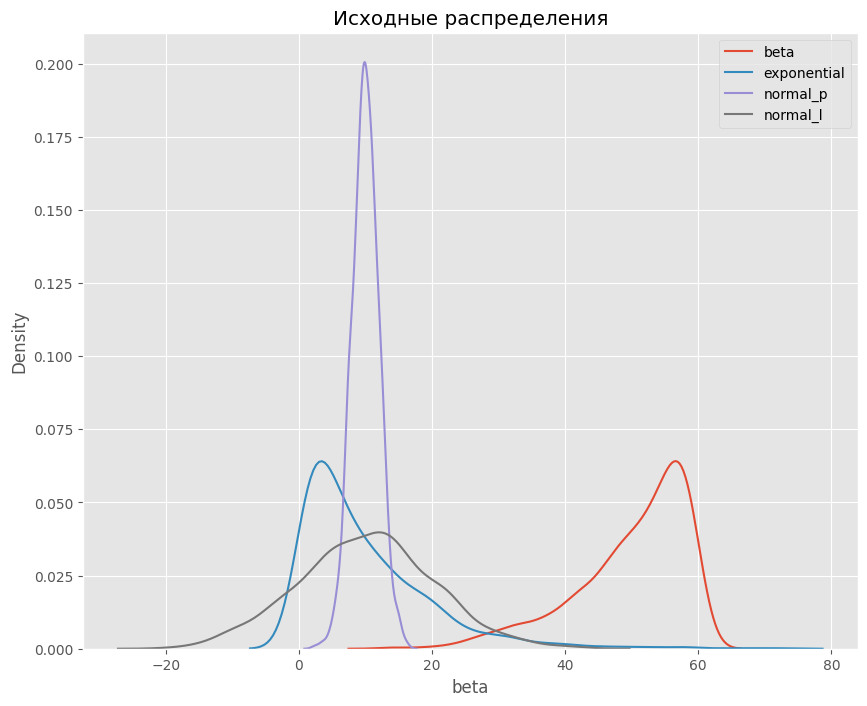

In [52]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их.

Зафиксируем описательные статистики до преобразований.



In [53]:
df.describe()


,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


Для нормализации данных мы будем использовать уже знакомую нам библиотеку sklearn.

## MINMAXSCALER

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.


Нормализация происходит следующим способом:

1. Из каждого значения признака х вычитается минимальное значение этого признака:  
2. Результат вычитания делится на разность между максимумом и минимумом признака: 

Например, температура в горном посёлке за день может меняться от 10 до 35 градусов. Текущая температура составляет 17 градусов. 

Нормализованное значение 0.28 лежит в диапазоне от 0 до 1, и ближе к левой границе распределения (0), что соответствует также ненормализованному распределению (значение 17 ближе к 10).

Класс [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform. Вы познакомитесь с ней подробнее в модулях машинного обучения.

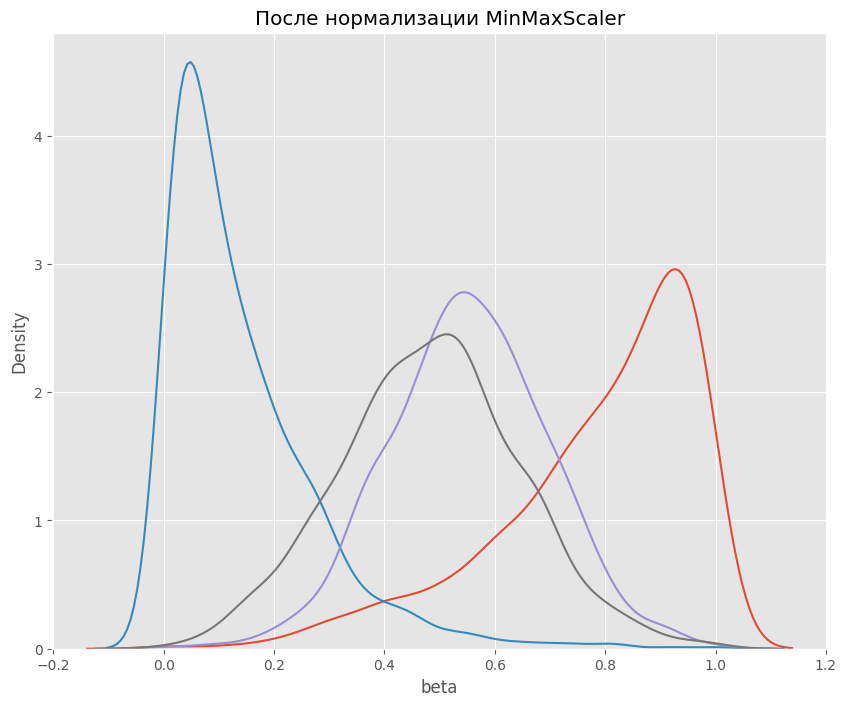

In [54]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns = col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1);


А так — описательные статистики:



In [55]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


## ROBUSTSCALER

Нормализация методом RobustScaler происходит в несколько этапов:

1. из каждого значения признака вычитается медиана признака:
2. полученное значение делится на межквартильный размах: (значение 75% - значение 25%)

Например, имеется числовой ряд [1, 2, 3, 4, 5]. Медиана ряда — 3. Межквартильный размах: . Мы хотим нормализовать число 4.

x = (4-3)/(2) = 0.5

Проведём нормализацию распределений признаков из обучающего примера, используя класс [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html).



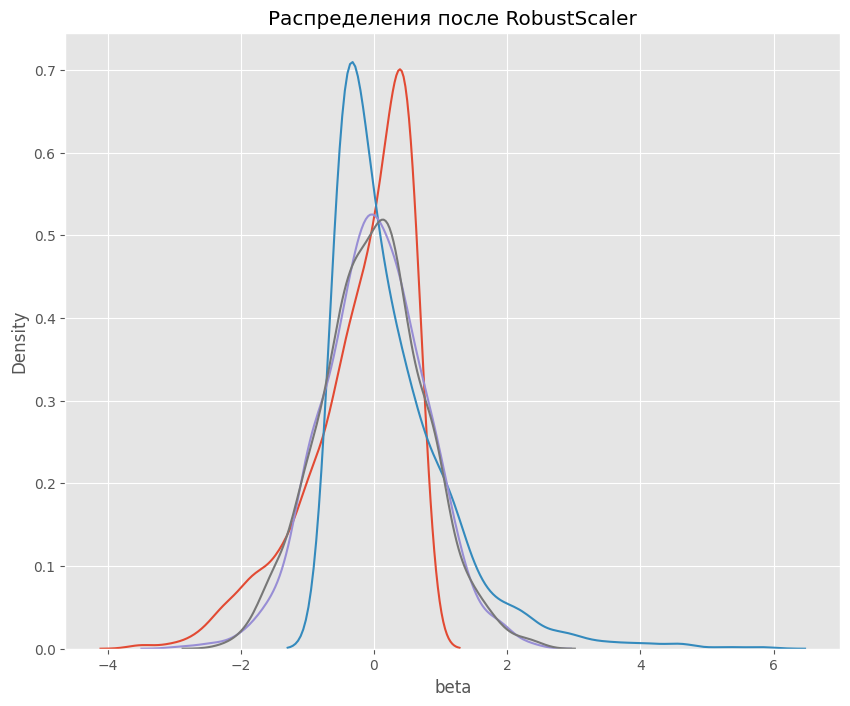

In [56]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1);

Описательные статистики после нормализации:



In [57]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


Из описательных статистик видно, что RobustScaler не масштабирует данные в заданный интервал, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

Поскольку MinMaxScaler использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

Больше о других способах нормализации и их сравнении вы можете прочитать в официальном [руководстве scikit-learn](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

## СТАНДАРТИЗАЦИЯ 

__Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1.__

x_scaled = (x-x_mean)/x_std

Этот процесс можно описать как центрирование данных с масштабированием. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. 

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

Чтобы понять, как стандартизация меняет распределение, рассмотрим метод стандартизации StandardScaler в Python.

## STANDARDSCALER

Для стандартизации используем класс [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).




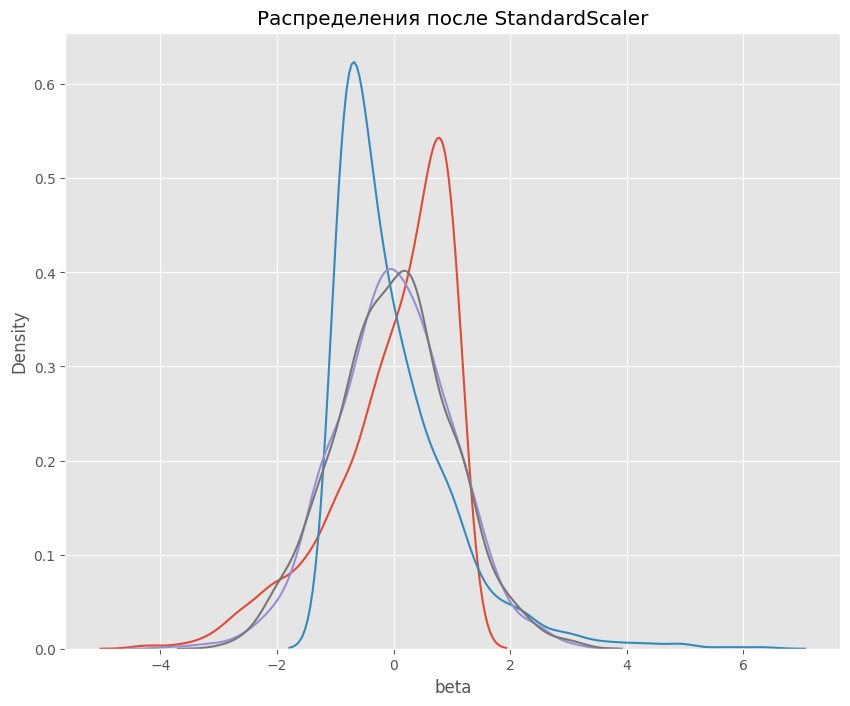

In [58]:
s_scaler = preprocessing.StandardScaler()

df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns = col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')


sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1);

Описательные статистики после нормализации:



In [59]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


Стандартное отклонение стало равным 1, а средние значения — 0. Распределения изменились подобно RobustScaler — стали более нормальными.

## НОРМАЛИЗОВАТЬ ИЛИ СТАНДАРТИЗИРОВАТЬ?

Так как нормализация и стандартизация преследуют одни и те же цели, возникают вопросы:

Когда признаки необходимо нормализовать, а когда стандартизировать? Какой способ нормализации выбрать? Преобразование входных переменных и выбор способа преобразования зависит от конкретной задачи и данных — заранее невозможно узнать, какое преобразования будет лучше. 

Однако мы составили небольшую инструкцию по преобразованию признаков:

* если признак распределён нормально, то его необходимо стандартизировать;
* если признак распределён ненормально, его необходимо нормализовать;
* если разброс значений небольшой, то можно обойтись без преобразования данных.

Что лучше? Нормализовать, а потом стандартизировать или наоборот?

Комбинации преобразований также могут быть эффективны. Поэтому проводите эксперименты над моделью и выбирайте то сочетание преобразований, которые обеспечивают лучший результат на ваших данных.

__Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.__

__В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.__

In [60]:
r_scaler = preprocessing.RobustScaler()

df_r = r_scaler.fit_transform(data[['price']], y=None)
df = pd.DataFrame(df_r, columns=['price'])

print(round(df['price'].sum()))

43501


__Стандартизируйте исходный признак price. В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.__

In [61]:
s_scaler = preprocessing.StandardScaler()

df_s = s_scaler.fit_transform(data[['price']], y=None)

df_s = pd.DataFrame(df_s, columns = ['price'])

print(round(df_s['price'][129968], 2))

-0.14


→ В этом юните мы рассмотрели основные преобразования в данных и научились применять их к признакам в наборе данных. В следующем юните вы узнаете про отбор признаков и мультиколлинеарность.

# 7. Отбор признаков. Мультиколлинеарность

Ещё одним важным этапом в жизненном цикле машинного обучения и в проектировании признаков является отбор признаков.

__Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.__

## ДЛЯ ЧЕГО НЕОБХОДИМО ОТБИРАТЬ ПРИЗНАКИ?

1. Сократить время обучения. Чем меньше данных, тем быстрее обучается модель. В редких случаях количество признаков в модели может быть больше 100.
2. Повысить качество предсказания. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют мультиколлинеарностью. 

## КАК ПОНЯТЬ, КАКИЕ ПРИЗНАКИ БОЛЬШЕ ВСЕГО ВЛИЯЮТ НА ПРЕДСКАЗАНИЕ?

Существует множество методов для отбора признаков. Однако для их использования необходимо понимать такие понятия, как значимость, критерий значимости, гипотеза. Однако есть и ещё один способ отобрать признаки для обучения — корреляция. 

В этом юните мы рассмотрим такое понятие, как мультиколлинеарность и её связь с отбором признаков.

__Мультиколлинеарность — сильная корреляционная связь между признаками, отбираемыми для обучения.__

Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных. Процесс корреляционного анализа и удаление сильно скоррелированных признаков относят к одному из методов отбора признаков.


_Рассмотрим отбор признаков в Python. Для этого воспользуемся обучающим датасетом о цветках ириса._

_Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):_

_sepal length — длина наружной доли околоцветника;_
_sepal width — ширина наружной доли околоцветника;_
_petal length — длина внутренней доли околоцветника;_
_petal width — ширина внутренней доли околоцветника._



In [62]:
iris = pd.read_csv('iris.zip')
display(iris.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Будем исследовать признаки, которые могут влиять на variety — sepal.length, sepal.width, petal.length, petal.width.

Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

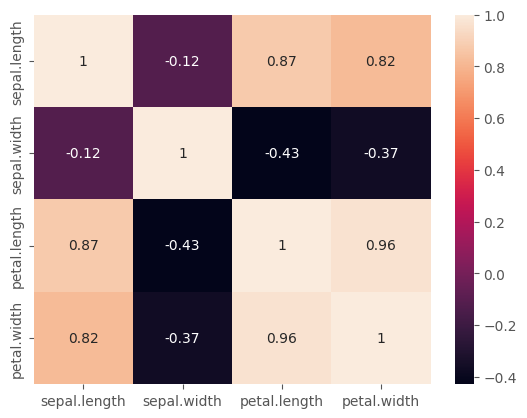

In [63]:
import seaborn as sns

sns.heatmap(iris.corr(numeric_only=True), annot=True);

Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: 
1. sepal.length и petal.width
2. petal.length и sepal.length
3. petal.width и petal.length.

Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:

In [64]:
iris = iris.drop(['petal.width'], axis=1)

Однако второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length. Удалим и его:

In [65]:
iris = iris.drop(['petal.length'], axis=1)

In [66]:
display(iris.head())

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


У нас осталось всего два признака с коэффициентом корреляции -0.12: sepal.width и sepal.length, и признак, который необходимо предсказать — variety. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

Это означает, что всего два признака — sepal length (длина наружной доли околоцветника) и sepal width (ширина наружной доли околоцветника) сообщают модели то же самое, что и исходный набор признаков. Мы уменьшили количество признаков, не потеряв при этом информацию о данных. А признаки petal length (длина внутренней доли околоцветника) и petal width (ширина внутренней доли околоцветник) сообщают лишнюю информацию для модели. Значит, они не нужны для построения модели.

## КАКОЙ ПРИЗНАК УДАЛЯТЬ?

Как понять, какой признак необходимо удалить из пары скоррелированных признаков?

Вы можете удалить любой признак из пары. Однако вы можете оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация. 

In [67]:
display(wine_cleared.head())

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,year,years_diff
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013-01-01,3298.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011-01-01,4029.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013-01-01,3298.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013-01-01,3298.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012-01-01,3664.0


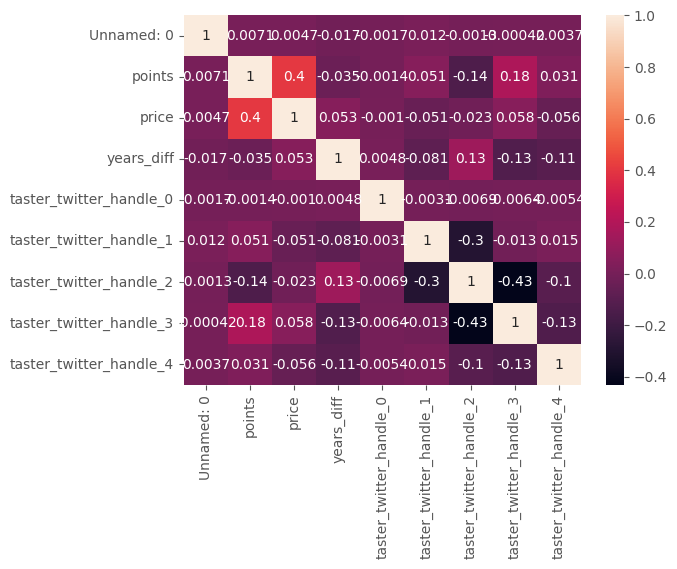

In [68]:
sns.heatmap(data.corr(numeric_only=True), annot=True);

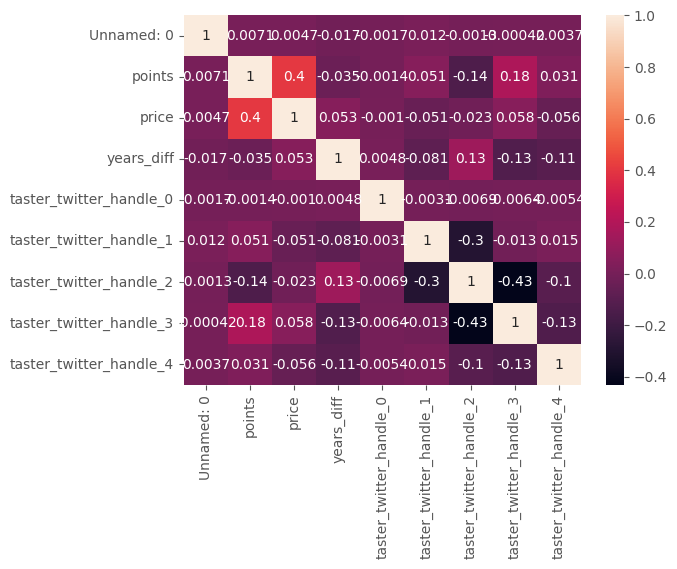

In [69]:
sns.heatmap(data.corr(numeric_only=True, method='pearson'), annot=True);

Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

❗️ Удалять признак рейтинг — points нельзя!

❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

Решение:

```python
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
```

В этом юните мы узнали, что такое отбор признаков и мультиколлинеарность, а также научились отбирать признаки путём исключения сильно скоррелированных признаков для дальнейшего построения модели. В следующем юните мы закрепим знания из юнитов проектирования признаков на практической задаче.

# 8. Проверка знаний

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

* age — возраст
* sex — пол (1 - мужчина, 0 - женщина)
* cp — тип боли в груди (4 значения)
* trestbps — артериальное давление в покое
* chol — холестерин сыворотки в мг/дл
* fbs — уровень сахара в крови натощак > 120 мг/дл
* restecg — результаты электрокардиографии в покое (значения 0,1,2)
* thalach — достигнута максимальная частота сердечных сокращений
* exang — стенокардия, вызванная физической нагрузкой
* oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
* slope — наклон пикового сегмента ST при нагрузке
* ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
* thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

*Задание 8.1*
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [70]:
heart = pd.read_csv('heart.zip')
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [71]:
heart['old'].sum()

79

*Задание 8.2*

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

Возраст (лет) | Мужчины	 | Женщины
--------|-----------|------------
до 20	| 123/76	|116/72
21-30	| 126/79	|120/75
31-40	| 129/81	|127/80
41-50	| 135/83	|137/84
51-60	| 142/85	|144/85
61 и старше	| 142/80	|159/85

В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [72]:
# Решение под вопросом

*Задание 8.5*

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

In [73]:
import category_encoders as ce

result = ['cp', 'restecg', 'slope', 'ca', 'thal']
encoder = ce.OneHotEncoder(cols=result) 
type_bin = encoder.fit_transform(heart[result])
heart = pd.concat([heart, type_bin], axis=1)
heart = heart.drop(columns=['cp','restecg','slope','ca','thal'],axis=1)
display(heart.shape)

(303, 29)

Задание 8.7

Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<Axes: >

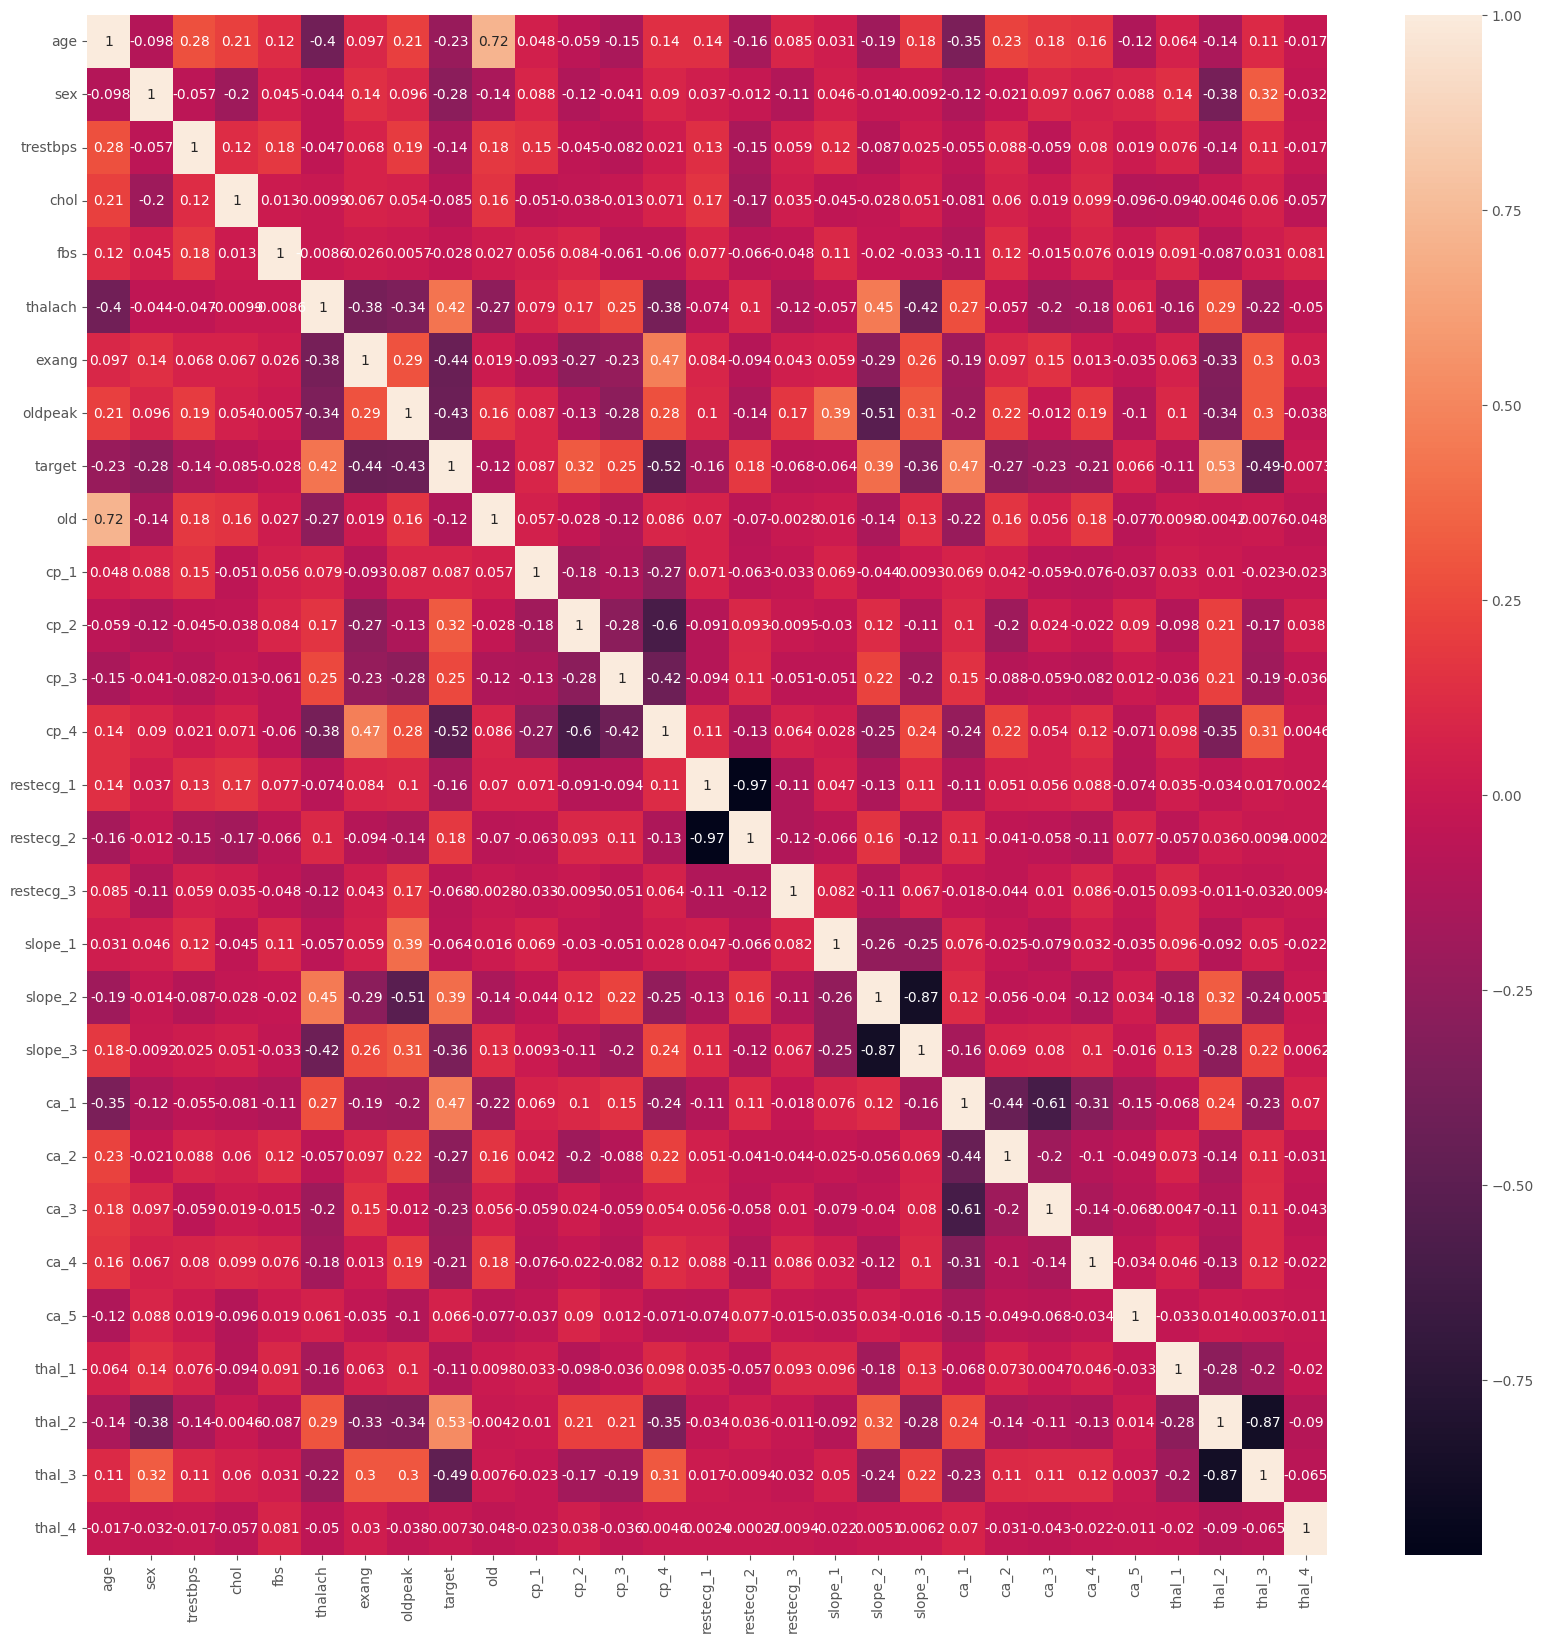

In [74]:
import matplotlib.pyplot as plt
_ , ax = plt.subplots(ncols=1, figsize=(20, 20))
sns.heatmap(heart.corr(), annot=True, axes = ax)

Задание 8.6
Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [77]:
# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(heart)
heart_r = pd.DataFrame(heart_r, columns=col_names)

heart_r.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,-0.455446,0.260726,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
